In [2]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt

import numpy as np

from itertools import cycle, islice

from collections import defaultdict, namedtuple, OrderedDict
import pandas as pd

import json
import pandas as pd

from tools import dependency
%matplotlib inline

In [31]:
plt.style.use('PapeFig.mplstyle')

In [4]:

RelData= namedtuple('RelData','layers heads transpose d2p')
RelData2 = namedtuple('RelData', 'layers heads layersT headsT weight weightT')
relation_rules  = OrderedDict(sorted({'adj-clause-p2d': RelData([4, 7, 6, 0], [5, 6, 5, 8],False, False),
    'adj-modifier-d2p': RelData([3, 7, 6, 5], [9, 10, 5, 7],False, True),
    'adv-clause-d2p': RelData([4, 4, 8, 3], [9, 3, 8, 1],False, True),
    'adv-modifier-d2p': RelData([7, 3, 6, 8], [6, 10, 5, 5],False, True),
    'all-d2p': RelData([3, 7, 3, 4], [9, 10, 10, 5],False, True),
    'apposition-p2d': RelData([0, 9], [8, 0],False, False),
    'auxiliary-d2p': RelData([3, 8, 7, 4], [9, 5, 10, 5],False, True),
    'clausal subject-p2d': RelData([8, 0, 0, 0], [10, 8, 5, 1],False, False),
    'clausal-d2p': RelData([7, 5, 4, 8], [0, 4, 6, 8],False, True),
    'compound-d2p': RelData([3, 5, 6, 0], [9, 11, 5, 8],False, True),
    'conjunct-d2p': RelData([4, 6, 1, 5], [3, 0, 10, 4],False, True),
    'determiner-d2p': RelData([7, 3, 4, 8], [10, 9, 5, 10],False, True),
    'noun-modifier-p2d': RelData([4, 0, 0, 3], [5, 8, 1, 3],False, False),
    'num-modifier-d2p': RelData([7, 6, 3, 1], [10, 5, 10, 5],False, True),
    'object-d2p': RelData([7, 6, 4, 5], [9, 9, 6, 3],False, True),
    'other-d2p': RelData([7, 4, 8, 0], [10, 5, 5, 8],False, True),
    'punctuation-p2d': RelData([11, 7, 2, 11], [6, 7, 2, 2],False, False),
    'subject-p2d': RelData([7, 4], [11, 10],False, False),
    'adj-clause-d2p': RelData([6, 4, 0, 8], [4, 6, 3, 10],False, True),
    'adj-modifier-p2d': RelData([3, 5, 0, 4], [5, 1, 2, 7],False, False),
    'adv-clause-p2d': RelData([4, 5, 5, 0], [3, 4, 8, 8],False, False),
    'adv-modifier-p2d': RelData([7, 4, 0, 6], [3, 7, 11, 2],False, False),
    'all-p2d': RelData([1, 0, 7, 0], [4, 2, 4, 11],False, False),
    'apposition-d2p': RelData([4, 0, 4, 3], [3, 9, 9, 8],False, True),
    'auxiliary-p2d': RelData([7, 6, 7, 6], [4, 3, 3, 9],False, False),
    'clausal subject-d2p': RelData([9, 1, 2, 1], [2, 11, 4, 8],False, True),
    'clausal-p2d': RelData([5, 6, 7, 5], [7, 7, 6, 8],False, False),
    'compound-p2d': RelData([3, 6, 0, 7], [5, 5, 2, 4],False, False),
    'conjunct-p2d': RelData([5, 4, 0, 4], [5, 3, 8, 4],False, False),
    'determiner-p2d': RelData([5, 1, 3, 8], [6, 4, 2, 6],False, False),
    'noun-modifier-d2p': RelData([7, 0, 5, 0], [9, 8, 3, 7],False, True),
    'num-modifier-p2d': RelData([7, 9, 1, 0], [11, 4, 10, 8],False, False),
    'object-p2d': RelData([7, 4, 0, 3], [10, 5, 8, 9],False, False),
    'other-p2d': RelData([6, 8], [9, 6],False, False),
    'punctuation-d2p': RelData([4, 8, 3, 7], [5, 5, 9, 5],False, True),
    'subject-d2p': RelData([5, 1, 7, 7], [9, 6, 1, 8],False, True)}.items()))

In [58]:
def plot_overlap(relation_rules_sub, title, ml=False):
    if ml:
        relation_rules_sub = [ lan + '-' + rel for rel in relation_rules_sub for lan in ('cs', 'fr', 'de', 'en') ]
    rev_map = {v: k for k, v in dependency.label_map.items()}
    rev_map['object'] = 'obj'
    cross_heads = np.zeros((len(relation_rules_sub), len(relation_rules_sub)))
    for idx, ki in enumerate(relation_rules_sub):
        vi = relation_rules[ki]
        for jdx, kj in enumerate(relation_rules_sub):
            vj = relation_rules[kj]
            i_head_set = set(zip(vi.layers, vi.heads))
            j_head_set = set(zip(vj.layers, vj.heads))

            cross_heads[idx, jdx] = len(i_head_set.intersection(j_head_set))
                

    fig, ax = plt.subplots(1,1,figsize=(6,6))

    im = ax.imshow(cross_heads,cmap='GnBu')
    for idx, ki in enumerate(relation_rules_sub):
        for jdx, kj in enumerate(relation_rules_sub):
            if cross_heads[idx, jdx]:
                if cross_heads[idx, jdx] > 2:
                    ax.text(idx, jdx, int(cross_heads[idx, jdx]), ha="center", va="center", color="lightgray")
                else:
                    ax.text(idx, jdx, int(cross_heads[idx, jdx]), ha="center", va="center", color="gray")

    ax.set_xlim((-0.5, len(relation_rules_sub) -0.5))
    ax.set_ylim((-0.5,len(relation_rules_sub) -0.5))
    ax.set_xticks(np.arange(len(relation_rules_sub)))
    ax.set_yticks(np.arange(len(relation_rules_sub)))
    if ml:
        ax.set_xticklabels(((lab[:2] + ' ' + rev_map[lab[3:-4]]).upper() for lab in relation_rules_sub), rotation=90)
        ax.set_yticklabels(((lab[:2] + ' ' + rev_map[lab[3:-4]]).upper() for lab in relation_rules_sub))

    else:
        ax.set_xticklabels((' '.join(rev_map[lab[:-4]].upper().split('-')) for lab in relation_rules_sub), rotation=90)
        ax.set_yticklabels((' '.join(rev_map[lab[:-4]].upper().split('-')) for lab in relation_rules_sub))

    #fig.colorbar(im, ax=ax, orientation='vertical')

    plt.savefig(title,dpi=300, bbox_inches='tight')
    plt.show()
    

In [5]:
relation_rules.keys()

odict_keys(['adj-clause-d2p', 'adj-clause-p2d', 'adj-modifier-d2p', 'adj-modifier-p2d', 'adv-clause-d2p', 'adv-clause-p2d', 'adv-modifier-d2p', 'adv-modifier-p2d', 'all-d2p', 'all-p2d', 'apposition-d2p', 'apposition-p2d', 'auxiliary-d2p', 'auxiliary-p2d', 'clausal subject-d2p', 'clausal subject-p2d', 'clausal-d2p', 'clausal-p2d', 'compound-d2p', 'compound-p2d', 'conjunct-d2p', 'conjunct-p2d', 'determiner-d2p', 'determiner-p2d', 'noun-modifier-d2p', 'noun-modifier-p2d', 'num-modifier-d2p', 'num-modifier-p2d', 'object-d2p', 'object-p2d', 'other-d2p', 'other-p2d', 'punctuation-d2p', 'punctuation-p2d', 'subject-d2p', 'subject-p2d'])

In [27]:
relation_rules_sub = ('adj-modifier-d2p', 'adv-modifier-d2p','auxiliary-d2p',
                      'determiner-d2p','noun-modifier-d2p','object-d2p','subject-d2p')
plot_overlap(relation_rules_sub, 'IntraSentD2P.pdf')

KeyError: 'adj-modifier-d2p'

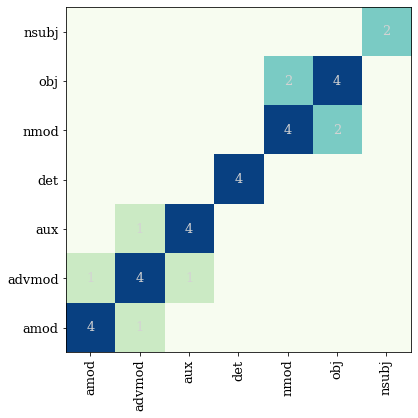

In [10]:
relation_rules_sub = ('adj-modifier-p2d', 'adv-modifier-p2d','auxiliary-p2d',
                      'determiner-p2d','noun-modifier-p2d','object-p2d','subject-p2d')
plot_overlap(relation_rules_sub, 'IntraSentP2D.pdf')

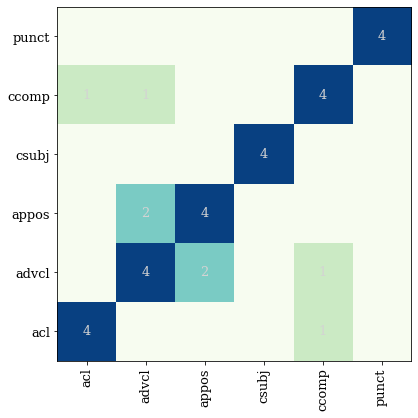

In [11]:
relation_rules_sub = ('adj-clause-d2p', 'adv-clause-d2p', 'apposition-d2p', 'clausal subject-d2p', 'clausal-d2p',  'punctuation-d2p')
plot_overlap(relation_rules_sub, 'ClausalD2P.pdf')

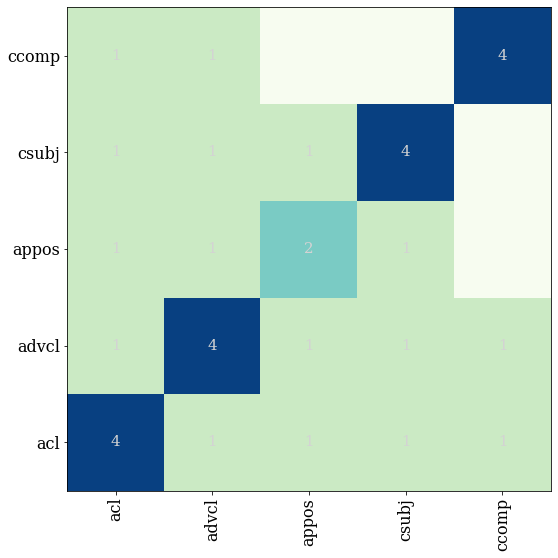

In [9]:
relation_rules_sub = ( 'adj-clause-p2d', 'adv-clause-p2d', 'apposition-p2d', 'clausal subject-p2d', 'clausal-p2d')
plot_overlap(relation_rules_sub, 'ClausalP2D.pdf')

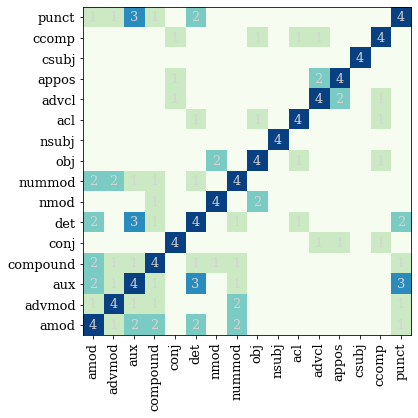

In [12]:
relation_rules_sub = ('adj-modifier-d2p', 'adv-modifier-d2p','auxiliary-d2p','compound-d2p',
                      'conjunct-d2p','determiner-d2p','noun-modifier-d2p','num-modifier-d2p',
                      'object-d2p','subject-d2p','adj-clause-d2p', 'adv-clause-d2p', 'apposition-d2p', 'clausal subject-d2p', 'clausal-d2p',  'punctuation-d2p')
plot_overlap(relation_rules_sub, 'AllD2P.pdf')

In [ ]:
-p2d

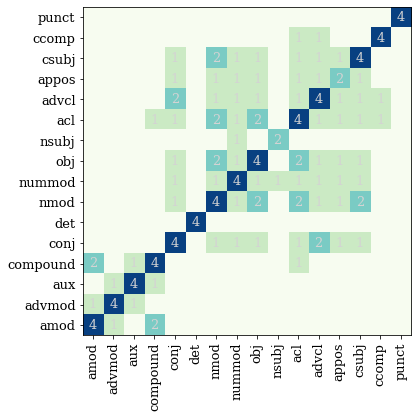

In [13]:
relation_rules_sub = ('adj-modifier-p2d', 'adv-modifier-p2d','auxiliary-p2d','compound-p2d',
                      'conjunct-p2d','determiner-p2d','noun-modifier-p2d','num-modifier-p2d',
                      'object-p2d','subject-p2d','adj-clause-p2d', 'adv-clause-p2d', 'apposition-p2d',
                      'clausal subject-p2d', 'clausal-p2d',  'punctuation-p2d')
plot_overlap(relation_rules_sub, 'AllP2D.pdf')

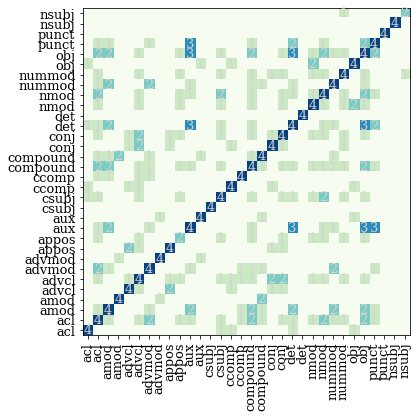

In [14]:
relation_rules_sub = ('adj-clause-d2p', 'adj-clause-p2d', 'adj-modifier-d2p', 'adj-modifier-p2d',
                      'adv-clause-d2p', 'adv-clause-p2d', 'adv-modifier-d2p', 'adv-modifier-p2d',
                      'apposition-d2p', 'apposition-p2d', 'auxiliary-d2p', 'auxiliary-p2d',
                      'clausal subject-d2p', 'clausal subject-p2d', 'clausal-d2p', 'clausal-p2d',
                      'compound-d2p', 'compound-p2d', 'conjunct-d2p', 'conjunct-p2d',
                      'determiner-d2p', 'determiner-p2d', 'noun-modifier-d2p', 'noun-modifier-p2d',
                      'num-modifier-d2p', 'num-modifier-p2d', 'object-d2p', 'object-p2d',
                      'punctuation-d2p', 'punctuation-p2d', 'subject-d2p', 'subject-p2d')
plot_overlap(relation_rules_sub, 'AllOverlap.pdf')

## multilingual

In [21]:
relation_rules = OrderedDict()
for lang in ('en','fr', 'cs', 'de'):
    with open(f'ml_heads/{lang}-heads2.json','r') as json_in:
        relation_rules_curr = json.load(json_in)
    
    for lab, val in relation_rules_curr.items():
        relation_rules[lang + '-' + lab[:-4] + '-p2d'] = RelData(val['layers'], val['heads'], True, False)
        relation_rules[lang + '-' + lab[:-4] + '-d2p'] = RelData(val['layersT'], val['headsT'], True, True)
        

In [12]:
relation_rules['en-adj-modifier-d2p']

RelData(layers=[8, 5, 7, 1], heads=[7, 10, 6, 3], transpose=True, d2p=True)

In [13]:
relation_rules['fr-adj-modifier-d2p']

RelData(layers=[5, 0, 7, 2], heads=[10, 0, 8, 10], transpose=True, d2p=True)

In [14]:
relation_rules['de-adj-modifier-d2p']

RelData(layers=[11, 5, 7, 0], heads=[6, 10, 6, 0], transpose=True, d2p=True)

In [22]:
relation_rules

OrderedDict([('en-adj-clause-p2d',
              RelData(layers=[11, 5, 0, 1], heads=[5, 9, 9, 3], transpose=True, d2p=False)),
             ('en-adj-clause-d2p',
              RelData(layers=[7, 5, 1, 3], heads=[8, 3, 6, 5], transpose=True, d2p=True)),
             ('en-adj-modifier-p2d',
              RelData(layers=[6, 4], heads=[10, 5], transpose=True, d2p=False)),
             ('en-adj-modifier-d2p',
              RelData(layers=[8, 5, 7, 1], heads=[7, 10, 6, 3], transpose=True, d2p=True)),
             ('en-adv-clause-p2d',
              RelData(layers=[11, 8, 11], heads=[5, 4, 1], transpose=True, d2p=False)),
             ('en-adv-clause-d2p',
              RelData(layers=[11, 11, 4], heads=[4, 2, 10], transpose=True, d2p=True)),
             ('en-adv-modifier-p2d',
              RelData(layers=[0, 11, 9, 8], heads=[0, 1, 10, 2], transpose=True, d2p=False)),
             ('en-adv-modifier-d2p',
              RelData(layers=[5, 3, 7, 0], heads=[10, 4, 10, 0], transpose=True, d2p=

In [41]:
plt.style.use('PapeFig.mplstyle')

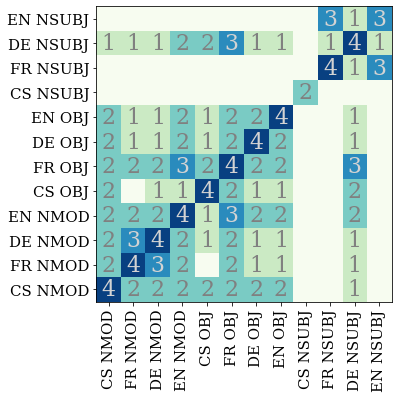

In [59]:
relation_rules_sub = ('noun-modifier-d2p','object-d2p','subject-d2p')
plot_overlap(relation_rules_sub, 'MlNominalSentD2P.pdf', ml=True)

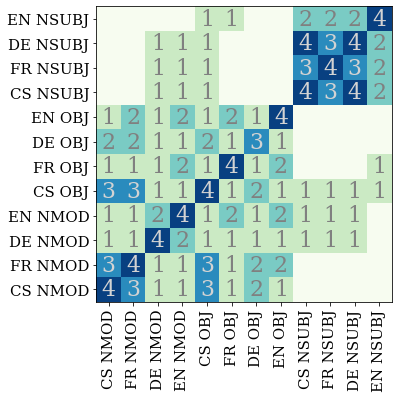

In [60]:
relation_rules_sub = ('noun-modifier-p2d','object-p2d','subject-p2d')
plot_overlap(relation_rules_sub, 'MlNominalSentP2D.pdf', ml=True)

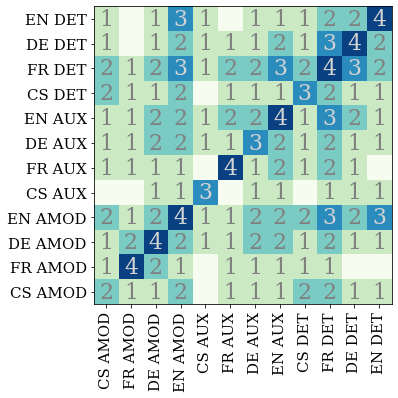

In [61]:
relation_rules_sub = ('adj-modifier-d2p','auxiliary-d2p','determiner-d2p')
plot_overlap(relation_rules_sub, 'MlModifiersSentD2P.pdf', ml=True)


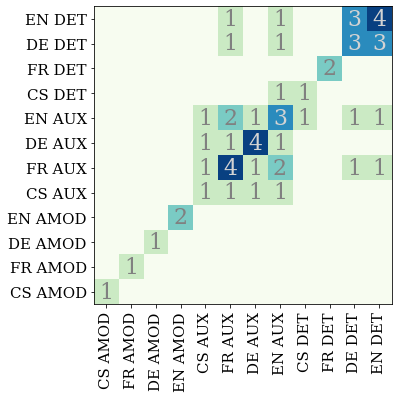

In [62]:
relation_rules_sub = ('adj-modifier-p2d','auxiliary-p2d', 'determiner-p2d')
plot_overlap(relation_rules_sub, 'MlModifiersSentP2D.pdf', ml=True)

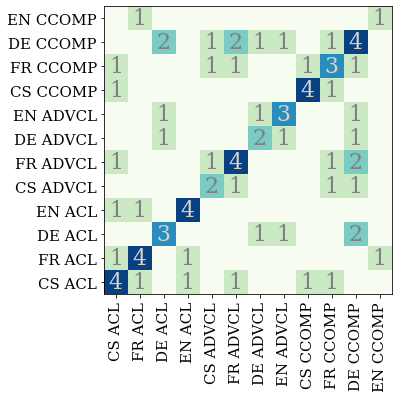

In [63]:
relation_rules_sub = ('adj-clause-d2p', 'adv-clause-d2p',  'clausal-d2p')
plot_overlap(relation_rules_sub, 'MlClausalD2P.pdf', ml=True)

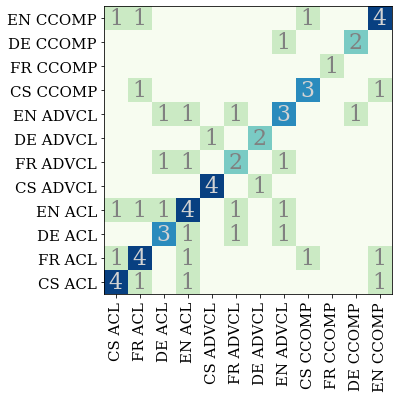

In [64]:
relation_rules_sub = ('adj-clause-p2d', 'adv-clause-p2d',  'clausal-p2d')
plot_overlap(relation_rules_sub, 'MlClausalP2D.pdf', ml=True)